In [7]:
# NAVIGATING KENYA'S HEALTH LANDSCAPE: A DATA ANALYST'S INSIGHTS


# Join me,on a concise exploration of Kenya's health facilities.

# I intend to answer the following queries:

# - Distribution of healthcare services by count across regions.

# -Number and type of services offered by health facilities(Dataset to be sourced)

# -Number of staff, equipment type and number, and medication availability(Dataset to be sourced)

# NOTES
# Our first query will be answered using an available dataset
#Source:Kaggle('https://www.kaggle.com/discussions/general/27448')

# I will source for the other datasets as we proceed with the project


In [8]:
# Import python libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [9]:
# Import our dataset
df = pd.read_excel(r"D:\JUDE PROGRAMMING\PORTFOLIO PROJECTS\KENYA HEALTH FACILITIES EDA\Health Facilities in Kenya Worksheet.xlsx")

In [10]:
df

,Facility Number,Facility Name,HMIS,Province,District,Division,LOCATION,County,Constituency,Sub-Location,Spatial Reference Method,Facility Type,Agency,Geolocation,Facility Type NAME
0,29,KIAMBU DISTRICT HOSPITAL,251,CENTRAL,KIAMBU,KIAMBAA,KIAMBAA S/AREA,KIAMBU,GATUNDU NORTH,TOWNSHIP(KIAMBAA),GPS,1,MOH,"(-1.16938000000, 36.82993000000)","Hospital Moh and Mission Districts, sub-districts"
1,36,KIJABE HOSPITAL,252,CENTRAL,KIAMBU,LARI,KIJABE,KIAMBU,GATUNDU NORTH,KIJABE,GPS,1,MISS,"(-0.94349000000, 36.59431000000)","Hospital Moh and Mission Districts, sub-districts"
2,51,NAZARETH HOSPITAL,255,CENTRAL,KIAMBU,LIMURU,KARAMBAINI,KIAMBU,GATUNDU NORTH,KARAMBAINI,1:50000 MAPS,1,MISS,"(-1.13378000000, 36.72570000000)","Hospital Moh and Mission Districts, sub-districts"
3,62,P.C.E.A. KIKUYU HOSPITAL,2441,CENTRAL,KIAMBU,KIKUYU,KIKUYU,KIAMBU,GATUNDU NORTH,KIKUYU TOWNSHIP,DDP,1,MISS,"(-1.26667000000, 36.66670000000)","Hospital Moh and Mission Districts, sub-districts"
4,66,TIGONI SUB-DISTRICT HOSPITAL,257,CENTRAL,KIAMBU,LIMURU,TIGONI,KIAMBU,GATUNDU NORTH,ITHANJI(KIAMBU),DDP,1,MOH,"(-1.12859000000, 36.64930000000)","Hospital Moh and Mission Districts, sub-districts"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6757,85,POST OFFICE DISP,3613,RIFT VALLEY,UASIN GISHU,NaN,NaN,NaN,NaN,NaN,NaN,9,PRIV,"(0E-11, 0E-11)","Institutions Health Facilities - schools, Univ..."
6758,62,NZOIA SUGAR DISP,2220,WESTERN,BUNGOMA,NaN,NaN,NaN,NaN,NaN,NaN,9,PRIV,"(0E-11, 0E-11)","Institutions Health Facilities - schools, Univ..."
6759,34,ST. CATHERINE SPECIAL SCHOOL DISP,2356,WESTERN,BUSIA,NaN,NaN,NaN,NaN,NaN,NaN,9,MISS,"(0E-11, 0E-11)","Institutions Health Facilities - schools, Univ..."
6760,0,FRAMO MEDICAL CLINIC,0,NYANZA,KISII NORTH,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,"(0E-11, 0E-11)",NaN


In [11]:
# View all columns in the dataset

df.columns

Index(['Facility Number', 'Facility Name', 'HMIS', 'Province', 'District',
       'Division', 'LOCATION', 'County', 'Constituency', 'Sub-Location',
       'Spatial Reference Method', 'Facility Type', 'Agency', 'Geolocation',
       'Facility Type NAME'],
      dtype='object')

In [12]:
# Drop columns irrelevant to this EDA

df = df.drop(columns = {'HMIS','Facility Number','Spatial Reference Method','LOCATION','Geolocation','Facility Type'}) 

In [13]:
# Increase number of rows to view

pd.set_option('display.max_rows',100 )

In [14]:
#View first 10 rows
df.head(10)

,Facility Name,Province,District,Division,County,Constituency,Sub-Location,Agency,Facility Type NAME
0,KIAMBU DISTRICT HOSPITAL,CENTRAL,KIAMBU,KIAMBAA,KIAMBU,GATUNDU NORTH,TOWNSHIP(KIAMBAA),MOH,"Hospital Moh and Mission Districts, sub-districts"
1,KIJABE HOSPITAL,CENTRAL,KIAMBU,LARI,KIAMBU,GATUNDU NORTH,KIJABE,MISS,"Hospital Moh and Mission Districts, sub-districts"
2,NAZARETH HOSPITAL,CENTRAL,KIAMBU,LIMURU,KIAMBU,GATUNDU NORTH,KARAMBAINI,MISS,"Hospital Moh and Mission Districts, sub-districts"
3,P.C.E.A. KIKUYU HOSPITAL,CENTRAL,KIAMBU,KIKUYU,KIAMBU,GATUNDU NORTH,KIKUYU TOWNSHIP,MISS,"Hospital Moh and Mission Districts, sub-districts"
4,TIGONI SUB-DISTRICT HOSPITAL,CENTRAL,KIAMBU,LIMURU,KIAMBU,GATUNDU NORTH,ITHANJI(KIAMBU),MOH,"Hospital Moh and Mission Districts, sub-districts"
5,KERUGOYA DISTRICT HOSPITAL,CENTRAL,KIRINYAGA,CENTRAL,KIRINYAGA,GICHUGU,KAGUYU(CENTRAL),MOH,"Hospital Moh and Mission Districts, sub-districts"
6,MWEA MISS HOSPITAL,CENTRAL,KIRINYAGA,MWEA,KIRINYAGA,GICHUGU,NGUKA,MISS,"Hospital Moh and Mission Districts, sub-districts"
7,GAICHANJIRU MISSION HOSPITAL,CENTRAL,MARAGUA,KANDARA,MURANG'A,MATHIOYA,GAKUI/KARIMAMWARO,MISS,"Hospital Moh and Mission Districts, sub-districts"
8,MARAGUA DISTRICT HOSPITAL (RHTC),CENTRAL,MARAGUA,MARAGUA,MURANG'A,MATHIOYA,GAKOIGO,MOH,"Hospital Moh and Mission Districts, sub-districts"
9,KIRIAINI MISS. HOSPITAL,CENTRAL,MURANGA,MATHIOYA,MURANG'A,MATHIOYA,KIRIAINI(MURANGA),MISS,"Hospital Moh and Mission Districts, sub-districts"


In [15]:
#View last 10 rows
df.tail(10)

,Facility Name,Province,District,Division,County,Constituency,Sub-Location,Agency,Facility Type NAME
6752,SITOI TEA ESTATE DISP,RIFT VALLEY,NANDI,NaN,NaN,NaN,NaN,PRIV,"Institutions Health Facilities - schools, Univ..."
6753,TECHNICAL DEPT CLINIC,RIFT VALLEY,NANDI,NANDI HILLS,NaN,NaN,KAPSOMBEWA,PRIV,"Institutions Health Facilities - schools, Univ..."
6754,ST. BRIGID SEC SCHOOL DISP,RIFT VALLEY,TRANS-NZOIA,NaN,NaN,NaN,NaN,OTHER MIN,"Institutions Health Facilities - schools, Univ..."
6755,GSU KIBISHI DISPENSARY,RIFT VALLEY,TURKANA,KIBISH,NaN,NaN,KIBISH,OTHER MIN,"Institutions Health Facilities - schools, Univ..."
6756,ELDORET AIRPORT CLINIC,RIFT VALLEY,UASIN GISHU,ELDORET,NaN,NaN,NaN,PRIV,"Institutions Health Facilities - schools, Univ..."
6757,POST OFFICE DISP,RIFT VALLEY,UASIN GISHU,NaN,NaN,NaN,NaN,PRIV,"Institutions Health Facilities - schools, Univ..."
6758,NZOIA SUGAR DISP,WESTERN,BUNGOMA,NaN,NaN,NaN,NaN,PRIV,"Institutions Health Facilities - schools, Univ..."
6759,ST. CATHERINE SPECIAL SCHOOL DISP,WESTERN,BUSIA,NaN,NaN,NaN,NaN,MISS,"Institutions Health Facilities - schools, Univ..."
6760,FRAMO MEDICAL CLINIC,NYANZA,KISII NORTH,NaN,NaN,NaN,NaN,NaN,NaN
6761,CENTRAL CLINIC,WESTERN,BUTERE/MUMIAS,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
# Rename some columns
df = df.rename(columns = {'Facility Type NAME': 'Facility Type'})

In [17]:
df.sort_values(by = "Agency")

,Facility Name,Province,District,Division,County,Constituency,Sub-Location,Agency,Facility Type
6461,GARISSA ARMY CAMP DISP,N. EASTERN,GARISSA,CENTRAL,GARISSA,BALAMBALA,WABERI,AF,"Institutions Health Facilities - schools, Univ..."
6554,KENYA AIR FORCE DISP,RIFT VALLEY,LAIKIPIA,CENTRAL,LAIKIPIA,LAIKIPIA NORTH,MAJENGO(LAIKIPIA),AF,"Institutions Health Facilities - schools, Univ..."
6675,12TH ENGINEERING DISP,CENTRAL,THIKA,NaN,NaN,NaN,NaN,AF,"Institutions Health Facilities - schools, Univ..."
6555,LAIKIPIA AIRBASE HEALTH CENTRE,RIFT VALLEY,LAIKIPIA,CENTRAL,LAIKIPIA,LAIKIPIA NORTH,MAJENGO(LAIKIPIA),AF,"Institutions Health Facilities - schools, Univ..."
6455,SCHOOL OF INFANTRY DISP. (MRS),EASTERN,ISIOLO,CENTRAL,ISIOLO,ISIOLO NORTH,BULLA PESA,AF,"Institutions Health Facilities - schools, Univ..."
...,...,...,...,...,...,...,...,...,...
4488,KAMA MEDICAL CLINIC,EASTERN,NORTH MERU,IGEMBE SOUTH,MERU,NORTH IMENTI,ATHIMBA,PRIV,Private Clinics and Medical centres
4490,KAWIRIA CLINIC,EASTERN,NORTH MERU,IGEMBE CENTRAL,MERU,NORTH IMENTI,KAIBU,PRIV,Private Clinics and Medical centres
3379,JUJA EST DISP,CENTRAL,THIKA,RUIRU,KIAMBU,GATUNDU NORTH,KIAORA,PRIV,Dispensary
6760,FRAMO MEDICAL CLINIC,NYANZA,KISII NORTH,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# View the data types available
# All available data is str
df.dtypes

Facility Name    object
Province         object
District         object
Division         object
County           object
Constituency     object
Sub-Location     object
Agency           object
Facility Type    object
dtype: object

In [19]:
df.describe()

,Facility Name,Province,District,Division,County,Constituency,Sub-Location,Agency,Facility Type
count,6760,6760,6760,5082,4855,4855,4982,6760,6760
unique,6538,8,70,468,47,47,2964,7,9
top,FAITH MEDICAL CLINIC,RIFT VALLEY,NAIROBI,CENTRAL,KAKAMEGA,SHINYALU,AFRAHA,PRIV,Dispensary
freq,7,1645,878,309,219,219,27,3142,2693


Text(0, 0.5, 'Number Of Health Facilities')

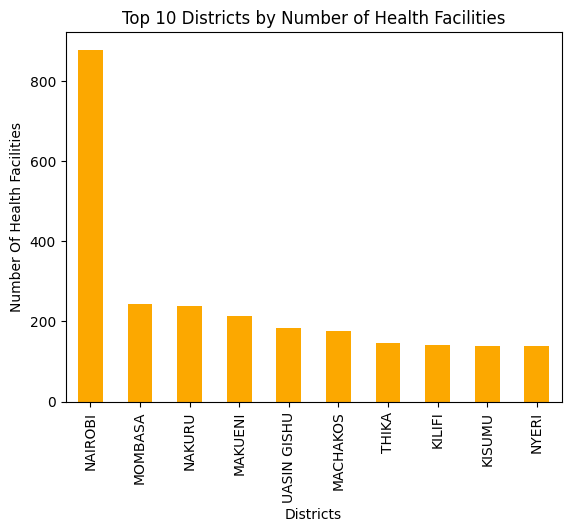

In [36]:
#1. Districts with the most health facilities(Top 10 )
df['District'].value_counts()\
.head(10)\
.plot(kind = 'bar',title = 'Top 10 Districts by Number of Health Facilities',color ='#fCA800')
plt.xlabel('Districts')
plt.ylabel('Number Of Health Facilities')

Text(0.5, 1.0, 'Top 3 Health Agencies In Kenya')

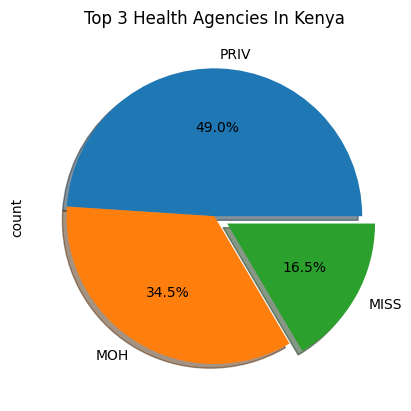

In [21]:
#2. What agencies are the health facilities in Kenya under? Find the top 3
df['Agency'].value_counts().head(3).plot(kind = 'pie',
                                         legend = False,                                                                            
                                         autopct='%1.1f%%',
                                         explode=(0, 0, 0.1),
                                         shadow = True),

plt.title('Top 3 Health Agencies In Kenya')




In [22]:
# 49% of health facilities in Rift Valley are  private(PRIV)
# 34.9% of health facilities in Rift Valley are under MOH(Ministry Of Health) 
# 16.5 of health facilities in Rift Valley are Mission hospitals(MISS)


In [23]:
# What is the Distribution of health facilities by province?

df['Province'].value_counts()


#Rift Valley has the most health facilities at 1645
# North Eastern province has the least facilities at 131

Province
RIFT VALLEY    1645
EASTERN        1093
NYANZA          962
NAIROBI         878
COAST           765
CENTRAL         745
WESTERN         541
N. EASTERN      131
Name: count, dtype: int64

Text(0, 0.5, 'Number Of Health Facilities')

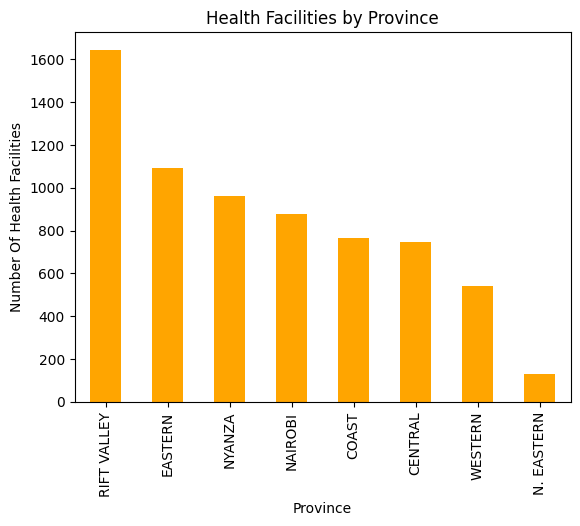

In [24]:
#Visualise this information

df['Province'].value_counts()\
.head(10)\
.plot(kind = 'bar',title = 'Health Facilities by Province',color ='orange')
plt.xlabel('Province')
plt.ylabel('Number Of Health Facilities')

In [25]:
# What is the biggest health agency in Rift Valley
#create a new dataset with only Rift Valley as the province

rift_valley_agency = df.loc[df['Province'] == 'RIFT VALLEY']

In [26]:
rift_valley_agency.describe()

#The rift valley has 722 health facilities under the Ministry Of Health(MOH)

,Facility Name,Province,District,Division,County,Constituency,Sub-Location,Agency,Facility Type
count,1645,1645,1645,1405,1321,1321,1371,1645,1645
unique,1620,1,19,144,17,17,874,7,9
top,MARIE STOPES CLINIC,RIFT VALLEY,NAKURU,CENTRAL,NAKURU,SUBUKIA,AFRAHA,MOH,Dispensary
freq,3,1645,239,89,181,181,27,722,866


Text(0.5, 1.0, 'Top 3 Health Agencies in the Rift Valley')

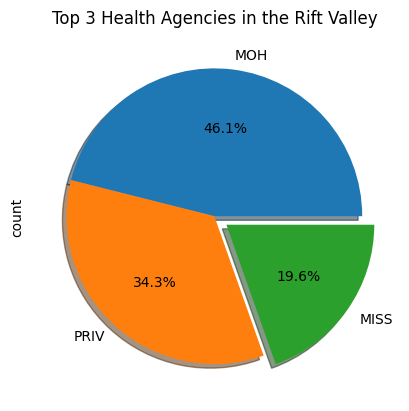

In [27]:
#Health agenciesn in the Rift Valley
# #Visualize this data
rift_valley_agency['Agency'].value_counts().head(3).plot(kind = 'pie',
                                         legend = False,                                                                            
                                         autopct='%1.1f%%',
                                         explode=(0, 0, 0.1),
                                         shadow = True),

plt.title('Top 3 Health Agencies in the Rift Valley')



In [28]:
# 34.3 of health facilities in Rift Valley are  private(PRIV)
# 46.1% of health facilities in Rift Valley are under MOH(Ministry Of Health) 
# 19.6% of health facilities in Rift Valley are Mission hospitals(MISS)

Text(0, 0.5, 'Number Of Health Facilities By County')

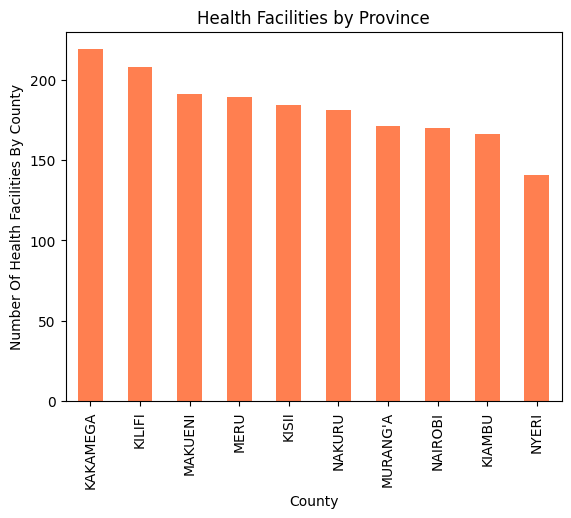

In [29]:
#Distribution of health facilities by county
df['County'].value_counts()\
.head(10)\
.plot(kind = 'bar',title = 'Health Facilities by Province',color ='coral')
plt.xlabel('County')
plt.ylabel('Number Of Health Facilities By County')

In [30]:
# Number of health facilites in Kakamega
kaka = df['County'] == 'KAKAMEGA'
kaka.value_counts()

#Kakamega has 219 health facilities

County
False    6543
True      219
Name: count, dtype: int64

In [31]:
# County with the least health facilities
df['County'].value_counts().tail(10)

# Mandera has 16 health facilities

County
TANA RIVER      60
WEST POKOT      58
TAITA TAVETA    58
LAIKIPIA        52
SAMBURU         47
MARSABIT        45
ISIOLO          43
WAJIR           39
LAMU            32
MANDERA         16
Name: count, dtype: int64

In [32]:
# Sub-Location with the most health facilities
df['Sub-Location'].value_counts().head()

# Afraha Sub-Location has the most health facilities(27)

Sub-Location
AFRAHA              27
TOWNSHIP(KISII)     23
BULLA PESA          17
KIZINGO(MOMBASA)    16
MJINI CENTRAL       15
Name: count, dtype: int64

In [33]:
# Sub-Location with the least health facilities
df['Sub-Location'].value_counts().tail()

# There are a number of Sub-Locations with only one health facilities

Sub-Location
KAANI              1
IKAATINI           1
KAUTI(MACHAKOS)    1
MATHATANI          1
KAPSOMBEWA         1
Name: count, dtype: int64

Text(0, 0.5, 'Number Of Health Facilities By Sub-Location')

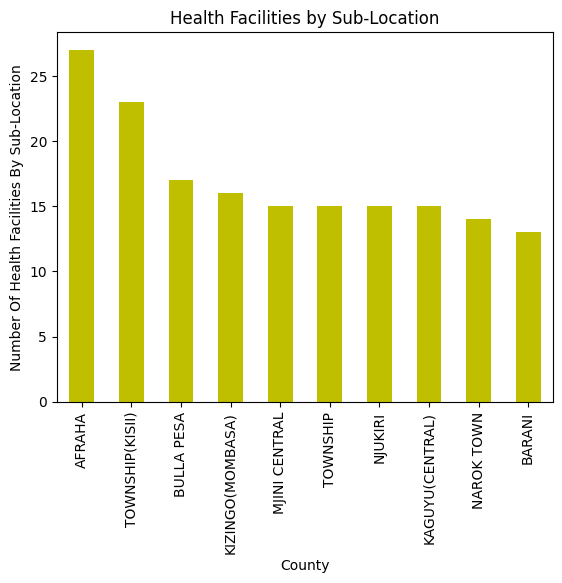

In [39]:
df['Sub-Location'].value_counts()\
.head(10)\
    .tail(10)\
        .plot(kind = 'bar',title = 'Health Facilities by Sub-Location',color ='#bfbf00')
plt.xlabel('County')
plt.ylabel('Number Of Health Facilities By Sub-Location')


In [40]:
# EDA to continue after sourcing for more datasets